In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler  # It is important in neural networks to scale the date
from sklearn.model_selection import train_test_split  # The standard - train/test to prevent overfitting and choose hyperparameters
from sklearn.metrics import accuracy_score # 

# remove later (allows untruncated printing for ease of testing/debugging)
import sys

NOTES:

We could try doing a **classification problem** , where we classify based on logistic regression?

No need for k-fold cross validation since we have a large dataset.

huge dataset, so probably not use an svm? but svms are allegedly good fr classification i think


We will be analyzing the Los Angeles Earthquakes Dataset containing information on earthquake events from January 1, 2012, to September 1, 2024 found on Kaggle.com.

We will be 

In [180]:
# read the data and split the data into X and y
# df = pd.read_csv('LosAngeles_Earthquake_Dataset.csv', delimiter=',')
df = pd.read_csv('LosAngeles_Earthquake_Dataset-removed-0s.csv', delimiter=',')
data = df.to_numpy()
feature_names = df[:0].columns

We will now look at the features available in the dataset.

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22560 entries, 0 to 22559
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   latitude                        22560 non-null  float64
 1   longitude                       22560 non-null  float64
 2   clustering_coefficient_30_days  22560 non-null  float64
 3   std_mag_30_days                 22560 non-null  float64
 4   rolling_mean_depth_30_days      22560 non-null  float64
 5   earthquakes_last_30_days        22560 non-null  int64  
 6   b_value                         22560 non-null  float64
 7   b_value_increment_i_i2          22560 non-null  float64
 8   b_value_increment_i2_i4         22560 non-null  float64
 9   b_value_increment_i4_i6         22560 non-null  float64
 10  b_value_increment_i6_i8         22560 non-null  float64
 11  b_value_increment_i8_i10        22560 non-null  float64
 12  max_mag_last_week               

Our dataset has 22899 data points and 19 features. We will be using the magnitude feature as our target feature.

**Do we wanna cut some of the data for processing reasons?**

Given the size of the dataset, we believe that it is possible to retain the same significant patterns if we were to reduce the dataset's size by randomly sampling a section of it to use for the rest of the project.

When taking our computation time/resources into account along with the fact that this is a school project, we did not find it necessary to use all 22899 data points in our testing, training, and validation.

We decided to only take...

wait do we use pca to see if we can cut some shit first?

**we would shuffle, then cut the datsets here**

In [182]:
# np.random.shuffle(data)
data = data[:5000, :]

In [183]:
X = data[:,:19]
y = data[:,19]
y = y.reshape(-1,1) # reshape y to be a 2d array bc/ X was already 2d, but y was one column
print("X has shape: ", X.shape)
print("y has shape: ", y.shape)

X has shape:  (5000, 19)
y has shape:  (5000, 1)


In [184]:
# scale the features of X
X_scale = StandardScaler()
X = X_scale.fit_transform(X)

In [185]:
# Split the data into training and test sets. 
# We use approximately 20% of the data for the test data and 20% for the validation data.
# The other 60% will be for training
X_tr, X_test_val, y_tr, y_test_val = train_test_split(X, y, test_size=0.4, random_state=42)
print("X_tr (train) has shape: ", X_tr.shape)
print("y_tr (train) has shape: ", y_tr.shape, "\n")


# need to split the 40% test data into 20% test and 20% validation data
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)


# halve the X_test_val set into X_test and X_val
X_test = X_test_val[:(X_test_val.shape[0] // 2),:]
y_test = y_test_val[:(y_test_val.shape[0] // 2),:]
print("X_test has shape: ", X_test.shape)
print("y_test has shape: ", y_test.shape, "\n")

X_val = X_test_val[(X_test_val.shape[0] // 2):,:]
y_val = y_test_val[(y_test_val.shape[0] // 2):,:]
print("X_val has shape: ", X_val.shape)
print("y_val has shape: ", y_val.shape)


X_tr (train) has shape:  (3000, 19)
y_tr (train) has shape:  (3000, 1) 

X_test has shape:  (1000, 19)
y_test has shape:  (1000, 1) 

X_val has shape:  (1000, 19)
y_val has shape:  (1000, 1)


We should now analyze data patterns (do we need to do pca? we have a lot of features...)

First, we'll analyze whether the # of earthquakes in the last 30 days influences the magnitude

Then we can look at frequencies of longitude and latitude (together? how would we do two variables against one)

If possible, I'd like to look at longitude and latitude with magnitude

Perhaps delta m - Difference between the largest observed and expected magnitudes.

Also, b_value as a histogram

C:\Users\selin\AppData\Local\Temp\ipykernel_932\564462602.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 5], y, s=50, cmap='autumn')


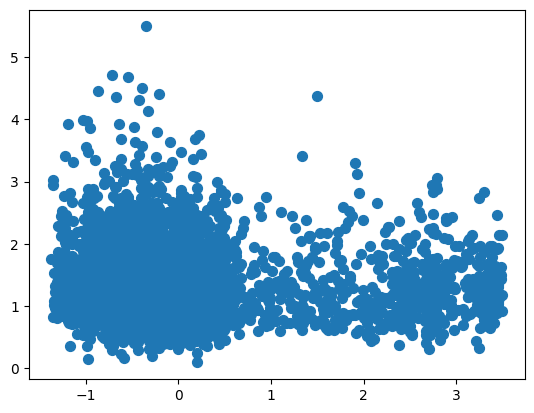

In [186]:
# 0 is the latitude
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.scatter(X[:, 5], y, s=50, cmap='autumn')

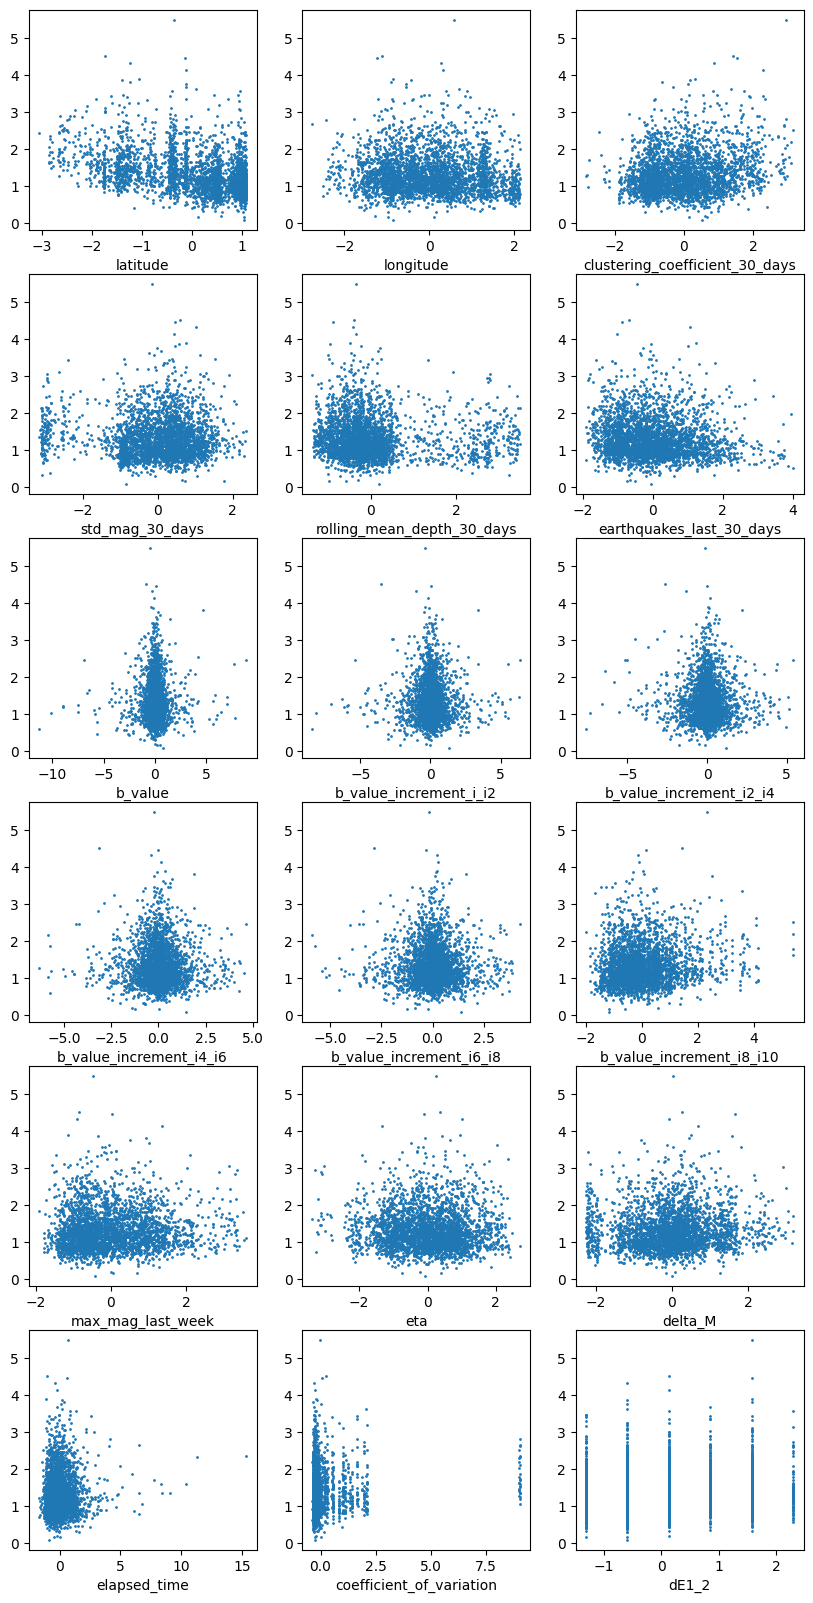

In [187]:
fig, axs = plt.subplots(6, 3, figsize=(10,20)) 
for i in range (0,6):
 for j in range (0,3):
   axs[i, j].scatter(X_tr[:,i*3+j+1],y_tr, s=1)
   axs[i, j].set_xlabel(feature_names[i*3+j])